In [6]:
#!pip install -q snscrape
!pip install -q sastrawi
!pip install openpyxl
!pip install nltk


LOAD DATASET

In [ ]:
import numpy as np 
import pandas as pd
import itertools
import re
import seaborn as sns

In [5]:
data = pd.read_excel('dataoprec44.xlsx')

In [7]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from collections import Counter
from itertools import chain
import nltk
stemmer = StemmerFactory().create_stemmer()
def stemming(string):
    try:
        string = stemmer.stem(string)
    except:
        pass
    return string


# Assuming you have nltk downloaded, if not run nltk.download('punkt')
nltk.download('punkt')
datawordl = data.copy()
datawordl['Alasan Memilih Bidang /Divisi Pertama ?'] = data['Alasan Memilih Bidang /Divisi Pertama ?'].apply(stemming)
# Flatten the text in column 24 into a single string
all_text = ' '.join(datawordl.iloc[:, 24].dropna())

# Tokenize the string into words
tokens = nltk.word_tokenize(all_text)

# Count the occurrences of each word
word_counts = Counter(tokens)

# Find the top 10 words
top_10_words = word_counts.most_common(10)

# Print the top 10 words and their counts
print("Top 10 words and their counts:")
for word, count in top_10_words:
    print(f"{word}: {count}")




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 words and their counts:
saya: 1273
dan: 820
yang: 746
ingin: 612
karena: 555
dengan: 515
di: 498
dalam: 424
ini: 399
untuk: 382


In [8]:
# Menampilkan nama-nama kolom
nama_kolom = data.columns

# Menampilkan hasil
nama_kolom

Index(['Timestamp', 'Email Address', 'Nama Lengkap', 'Nama Panggilan',
       'Tempat Lahir', 'Tanggal Lahir', 'Jenis Kelamin', 'Alamat Asal',
       'Alamat di Bandung', 'Id Line',
       ...
       'Urutkan ketersediaanmu jika menjadi volunteer sebuah bidang - divisi [Qurban Pencacahan]',
       'Urutkan ketersediaanmu jika menjadi volunteer sebuah bidang - divisi [Qurban Distribusi]',
       'Urutkan ketersediaanmu jika menjadi volunteer sebuah bidang - divisi [Qurban - Shalat Idul Adha]',
       'Urutkan ketersediaanmu jika menjadi volunteer sebuah bidang - divisi [Festival Adha - EO]',
       'Urutkan ketersediaanmu jika menjadi volunteer sebuah bidang - divisi [Festival Adha - Satisfy]',
       'Urutkan ketersediaanmu jika menjadi volunteer sebuah bidang - divisi [Festival Adha - Social Project]',
       'Urutkan ketersediaanmu jika menjadi volunteer sebuah bidang - divisi [Festival Adha Pre Event]',
       'Urutkan ketersediaanmu jika menjadi volunteer sebuah bidang - divisi [En

# DATA CLEANING
menghapus spasi dan menjadikan semua karakter menjadi lowercase

In [9]:
# Menghapus spasi pada kolom "Alasan Memilih Bidang/Divisi Pertama? pada divisi"
data.rename(columns=lambda x: x.strip() if isinstance(x, str) else x, inplace=True)

column_name = 'Alasan Memilih Bidang /Divisi Pertama ?'

# Remove spaces and convert to lowercase in the specified column
data[column_name] = data[column_name].str.replace(' ', '').str.lower()

# Now, the values in the specified column have spaces removed and are in lowercase
data[column_name]


0       saatmasihkuliahqadarullahsayamenjadikoordinato...
1       karenasayasukaberinteraksidenganduniasosmed,di...
2       setiapmenjadipanitiakonsumsientahkenapapunyake...
3       karenasayasukamemotretsuasanadenganaestheticte...
4       inginmencurahkanpotensiyangsudahdimilikisertam...
                              ...                        
1013    karenasayainginikutsertauntukmenyemarakkansuas...
1014    sayasenangmengikutikegiatansosialsepertiberbag...
1015    sayatertarikdengandivisitersebutdancukupmemumpuni
1016    bismillah.divisiinspirasiramadhanmerupakansebu...
1017    sepertiyangtelahsayajelaskanpadacaptiontwibbon...
Name: Alasan Memilih Bidang /Divisi Pertama ?, Length: 1018, dtype: object

## Stemming

In [10]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [11]:
stemmer = StemmerFactory().create_stemmer()

In [12]:
def stemming(string):
    try:
        string = stemmer.stem(string)
    except:
        pass
    return string

data['Alasan Memilih Bidang /Divisi Pertama ?'] = data['Alasan Memilih Bidang /Divisi Pertama ?'].apply(stemming)

## Overlap Coefficient Algorithm

In [13]:
df = data.replace(r'^s*$',float('NaN'), regex=True)
df.dropna(subset = ['Alasan Memilih Bidang /Divisi Pertama ?'], inplace = True)
df_reset = df.reset_index(drop=True)

In [14]:
# Mendapatkan total pendaftar masing-masing divisi
nilai_unik = df['Pilihan Pertama Bidang -  Divisi'].value_counts()
print(nilai_unik[:4])

# Menghitung nilai unik dan mengurutkannya secara descending
nilai_unik_count = df['Pilihan Pertama Bidang -  Divisi'].value_counts().sort_values(ascending=False)
array_of_string_desc = nilai_unik_count.index.tolist()

Pilihan Pertama Bidang -  Divisi
Konsumsi Ramadhan - Berbagi Buka    108
Konsumsi Ramadhan - Takjil           90
Syiar - Festival Ramadan             72
Syiar - Ramadhan Muslimah            55
Name: count, dtype: int64


In [15]:
print(df.iloc[576])


Timestamp                                                                                                       2023-01-22 19:17:34.820000
Email Address                                                                                            muhamad.fahri.gunawan16@gmail.com
Nama Lengkap                                                                                                       Muhammad Fahri Gunawan 
Nama Panggilan                                                                                                                       fahri
Tempat Lahir                                                                                                                     Sukabumi 
                                                                                                                       ...                
Urutkan ketersediaanmu jika menjadi volunteer sebuah bidang - divisi [Festival Adha - Social Project]                                  2.0
Urutkan ketersediaanmu jika

In [16]:
def calculateJaccardOverlap(string1, string2):
    # Convert each string into a set of characters
    set1 = set(string1.replace(' ', '').lower())
    set2 = set(string2.replace(' ', '').lower())

    # Calculate Jaccard Index
    intersection = len(set1 & set2)
    union_size = len(set1 | set2)
    jaccard_index = intersection / union_size

    # Calculate Overlap Coefficient
    overlap_coefficient = intersection / min(len(set1), len(set2))

    return jaccard_index, overlap_coefficient

# List Indikator perdivisi
indikator_buka = ("kemampuanorganisasiketerampilankomunikasiketerlibatandalamkegiatansosialpengetahuantentangkeberagamanmakanankomitmenterhadapnilainilaiRamadhanketerampilantimdanfleksibilitasterhadapperubahan")
indikator_takjil = ("kemampuanorganisasipengetahuantentangvariasitakjilketerampilankomunikasiketerlibatandalamkegiatansosialkomitmenterhadapnilainilaiRamadhanketerampilantimdanfleksibilitasterhadapperubahan")
indikator_muslimah = ("kemampuanorganisasiuntukacarakhususmuslimahkreativitasdalampenyelenggaraankegiatanyangbersifatinklusiketerampilankomunikasiyangsensitifterhadapkebutuhanmuslimahketerlibatandalamkegiatansosialyangmendukungperempuanpemahamanmendalamtentangnilainilairamadhanbagimuslimahketerampilantimdanfleksibilitasdalammenyesuaikanacaradengankeberagamanperempuanmuslim")
indikator_itikaf = ("kemampuanorganisasiuntukmenyediakanlayananselamaitikafketerampilankomunikasdalammendukungkebutuhanjamaahketerlibatandalamkegiatansosialditengahtengahitikafpemahamanmendalamtentangtatacaraitikafkomitmenterhadapnilainilaikeagamaanketerampilantimdanfleksibilitasdalammenyediakanpelayananyangsesuaidengansuasanaitikaf")
indikator_exhib = ("kemampuanorganisasiuntukpamerankreativitasdalampenyelenggaraanfestivalketerampilankomunikasidalammempromosikanpameranpengetahuantentangnilainilaiIdulAdhaketerlibatandalamkegiatansosialketerampilantimdanfleksibilitasdalammenyelenggarakanpameranyangmencerminkanmaknadannilainilaiiduladha")
# PENERAPAN
# Menginisialisasi dataset baru untuk menyimpan hasil seleksi
df["Jaccard_Index"] = 0.0
df["Overlap_Coefficient"] = 0.0
dataset_indexjacard = []
dataset_koeftumpangtindih = []
dataset_indexjacard2 = []
dataset_koeftumpangtindih2 = []
dataset_indexjacard3 = []
dataset_koeftumpangtindih3 = []
dataset_indexjacard4 = []
dataset_koeftumpangtindih4 = []

df.reset_index(drop=True, inplace=True)

# Seleksi dan perbandingan
for index, selected_value in enumerate(df["Alasan Memilih Bidang /Divisi Pertama ?"]):
    # print(df["Pilihan Pertama Bidang -  Divisi"][index])
    # print(selected_value)
    if index < len(df) and df["Pilihan Pertama Bidang -  Divisi"][index] == "Konsumsi Ramadhan - Berbagi Buka":
        # print(i)
        # print(df["Pilihan Pertama Bidang -  Divisi"][index] )
        jaccard_index, overlap_coefficient = calculateJaccardOverlap(indikator_buka, selected_value)

        # Update the new columns
        df.at[index, "Jaccard_Index"] = jaccard_index
        df.at[index, "Overlap_Coefficient"] = overlap_coefficient

        if jaccard_index > 0.8 :
            dataset_indexjacard.append(df.iloc[index].reset_index(drop=True))
            # print(dataset_indexjacard)
        if  overlap_coefficient > 0.8:
            dataset_koeftumpangtindih.append(df.iloc[index].reset_index(drop=True))
    if index < len(df) and df["Pilihan Pertama Bidang -  Divisi"][index] == "Konsumsi Ramadhan - Takjil":
        # print(i)
        # print(df["Pilihan Pertama Bidang -  Divisi"][index] )
        jaccard_index, overlap_coefficient = calculateJaccardOverlap(indikator_buka, selected_value)

        # Update the new columns
        df.at[index, "Jaccard_Index"] = jaccard_index
        df.at[index, "Overlap_Coefficient"] = overlap_coefficient

        if jaccard_index > 0.8 :
            dataset_indexjacard2.append(df.iloc[index].reset_index(drop=True))
            # print(dataset_indexjacard)
        if  overlap_coefficient > 0.8:
            dataset_koeftumpangtindih2.append(df.iloc[index].reset_index(drop=True))
    if index < len(df) and df["Pilihan Pertama Bidang -  Divisi"][index] == "Syiar - Festival Ramadan":
        # print(i)
        # print(df["Pilihan Pertama Bidang -  Divisi"][index] )
        jaccard_index, overlap_coefficient = calculateJaccardOverlap(indikator_buka, selected_value)

        # Update the new columns
        df.at[index, "Jaccard_Index"] = jaccard_index
        df.at[index, "Overlap_Coefficient"] = overlap_coefficient

        if jaccard_index > 0.8 :
            dataset_indexjacard3.append(df.iloc[index].reset_index(drop=True))
            # print(dataset_indexjacard)
        if  overlap_coefficient > 0.8:
            dataset_koeftumpangtindih3.append(df.iloc[index].reset_index(drop=True))
    if index < len(df) and df["Pilihan Pertama Bidang -  Divisi"][index] == "Syiar - Ramadhan Muslimah":
        # print(i)
        # print(df["Pilihan Pertama Bidang -  Divisi"][index] )
        jaccard_index, overlap_coefficient = calculateJaccardOverlap(indikator_buka, selected_value)

        # Update the new columns
        df.at[index, "Jaccard_Index"] = jaccard_index
        df.at[index, "Overlap_Coefficient"] = overlap_coefficient

        if jaccard_index > 0.8 :
            dataset_indexjacard4.append(df.iloc[index].reset_index(drop=True))
            # print(dataset_indexjacard)
        if  overlap_coefficient > 0.8:
            dataset_koeftumpangtindih4.append(df.iloc[index].reset_index(drop=True))

# Membuat DataFrame baru dari hasil seleksi
df_indexjacard = pd.DataFrame(dataset_indexjacard).reset_index(drop=True)
df_koeftumpangtindih = pd.DataFrame(dataset_koeftumpangtindih).reset_index(drop=True)
df_indexjacard2 = pd.DataFrame(dataset_indexjacard2).reset_index(drop=True)
df_koeftumpangtindih2 = pd.DataFrame(dataset_koeftumpangtindih2).reset_index(drop=True)
df_indexjacard3 = pd.DataFrame(dataset_indexjacard3).reset_index(drop=True)
df_koeftumpangtindih3 = pd.DataFrame(dataset_koeftumpangtindih3).reset_index(drop=True)
df_indexjacard4 = pd.DataFrame(dataset_indexjacard4).reset_index(drop=True)
df_koeftumpangtindih4 = pd.DataFrame(dataset_koeftumpangtindih4).reset_index(drop=True)



In [17]:
# Menampilkan hasil
print("Data yang memenuhi kriteria Indeks Jaccard > 0.8 dan kesamaan divisi Konsumsi Ramadhan - Berbagi Buka :")
df_indexjacard = df_indexjacard.rename(columns={2: 'Nama Lengkap', 275: 'Jaccard_Index', 276: 'Overlap_Coefficient'})
selected_columns = [2, 275, 276]
df_indexjacard.iloc[:, selected_columns]


Data yang memenuhi kriteria Indeks Jaccard > 0.8 dan kesamaan divisi Konsumsi Ramadhan - Berbagi Buka :


,Nama Lengkap,Jaccard_Index,Overlap_Coefficient
0,Nining,0.850000,0.944444
1,Muhammad Raja Ababil,0.809524,0.944444
2,Djauhari Adham Roseno,0.850000,0.944444
3,Siti Sopa Lismaya,0.809524,0.944444
4,Muhammad Fadli Fauzi Sileuw,0.944444,1.000000
5,Gemuruh Bagus Wirayudha,0.900000,1.000000
6,Risma Suci Nabilah,0.809524,0.944444
7,Zahra Fariha Nuruzzakiah Artyasa,0.842105,0.941176
8,Moch Andrian Akbar,0.857143,1.000000
9,Achmad Kabir Rifai,0.818182,1.000000


In [18]:
print("DataFrame baru dari hasil seleksi dengan Indeks Jacard divisi Konsumsi Ramadhan - Berbagi Buka > 0.8:")
df_indexjacard = df_indexjacard.rename(columns={2: 'Nama Lengkap', 275: 'Jaccard_Index', 276: 'Overlap_Coefficient'})
selected_columns = [2, 275, 276]
p = df_indexjacard.iloc[:, selected_columns]
num_rows1 = p.shape[0]
print(f"panitia yang lolos sebanyak : {num_rows1}")

print("DataFrame baru dari hasil seleksi dengan Indeks Jacard divisi Konsumsi Ramadhan - Takjil > 0.8:")
df_indexjacard2 = df_indexjacard2.rename(columns={2: 'Nama Lengkap', 275: 'Jaccard_Index', 276: 'Overlap_Coefficient'})
p = df_indexjacard2.iloc[:, selected_columns]
num_rows2 = p.shape[0]
print(f"panitia yang lolos sebanyak : {num_rows2}")

print("DataFrame baru dari hasil seleksi dengan Indeks Jacard divisi Syiar - Festival Ramadan > 0.8:")
df_indexjacard3 = df_indexjacard3.rename(columns={2: 'Nama Lengkap', 275: 'Jaccard_Index', 276: 'Overlap_Coefficient'})
p = df_indexjacard3.iloc[:, selected_columns]
num_rows3 = p.shape[0]
print(f"panitia yang lolos sebanyak : {num_rows3}")

print("DataFrame baru dari hasil seleksi dengan Indeks Jacard divisi Syiar - Ramadhan Muslimah > 0.8:")
df_indexjacard4 = df_indexjacard4.rename(columns={2: 'Nama Lengkap', 275: 'Jaccard_Index', 276: 'Overlap_Coefficient'})
p = df_indexjacard4.iloc[:, selected_columns]
num_rows4 = p.shape[0]
print(f"panitia yang lolos sebanyak : {num_rows4}")

DataFrame baru dari hasil seleksi dengan Indeks Jacard divisi Konsumsi Ramadhan - Berbagi Buka > 0.8:
panitia yang lolos sebanyak : 44
DataFrame baru dari hasil seleksi dengan Indeks Jacard divisi Konsumsi Ramadhan - Takjil > 0.8:
panitia yang lolos sebanyak : 32
DataFrame baru dari hasil seleksi dengan Indeks Jacard divisi Syiar - Festival Ramadan > 0.8:
panitia yang lolos sebanyak : 31
DataFrame baru dari hasil seleksi dengan Indeks Jacard divisi Syiar - Ramadhan Muslimah > 0.8:
panitia yang lolos sebanyak : 12


In [19]:
# Menampilkan hasil data dari koef tumpang tindih
print("DataFrame baru dari hasil seleksi dengan Overlap Coefficient divisi Konsumsi Ramadhan - Berbagi Buka > 0.8:")
df_koeftumpangtindih = df_koeftumpangtindih.rename(columns={2: 'Nama Lengkap', 275: 'Jaccard_Index', 276: 'Overlap_Coefficient'})
selected_columns = [2, 275, 276]
p = df_koeftumpangtindih.iloc[:, selected_columns]
num_rows1 = p.shape[0]
print(f"panitia yang lolos sebanyak: {num_rows1}")

print("DataFrame baru dari hasil seleksi dengan Overlap Coefficient divisi Konsumsi Ramadhan - Takjil > 0.8:")
df_koeftumpangtindih2 = df_koeftumpangtindih2.rename(columns={2: 'Nama Lengkap', 275: 'Jaccard_Index', 276: 'Overlap_Coefficient'})
p = df_koeftumpangtindih2.iloc[:, selected_columns]
num_rows2 = p.shape[0]
print(f"panitia yang lolos sebanyak: {num_rows2}")

print("DataFrame baru dari hasil seleksi dengan Overlap Coefficient divisi Syiar - Festival Ramadan > 0.8:")
df_koeftumpangtindih3 = df_koeftumpangtindih3.rename(columns={2: 'Nama Lengkap', 275: 'Jaccard_Index', 276: 'Overlap_Coefficient'})
p = df_koeftumpangtindih3.iloc[:, selected_columns]
num_rows3 = p.shape[0]
print(f"panitia yang lolos sebanyak: {num_rows3}")

print("DataFrame baru dari hasil seleksi dengan Overlap Coefficient divisi Syiar - Ramadhan Muslimah > 0.8:")
df_koeftumpangtindih4 = df_koeftumpangtindih4.rename(columns={2: 'Nama Lengkap', 275: 'Jaccard_Index', 276: 'Overlap_Coefficient'})
p = df_koeftumpangtindih4.iloc[:, selected_columns]
num_rows4 = p.shape[0]
print(f"panitia yang lolos sebanyak: {num_rows4}")


DataFrame baru dari hasil seleksi dengan Overlap Coefficient divisi Konsumsi Ramadhan - Berbagi Buka > 0.8:
panitia yang lolos sebanyak: 107
DataFrame baru dari hasil seleksi dengan Overlap Coefficient divisi Konsumsi Ramadhan - Takjil > 0.8:
panitia yang lolos sebanyak: 89
DataFrame baru dari hasil seleksi dengan Overlap Coefficient divisi Syiar - Festival Ramadan > 0.8:
panitia yang lolos sebanyak: 72
DataFrame baru dari hasil seleksi dengan Overlap Coefficient divisi Syiar - Ramadhan Muslimah > 0.8:
panitia yang lolos sebanyak: 54


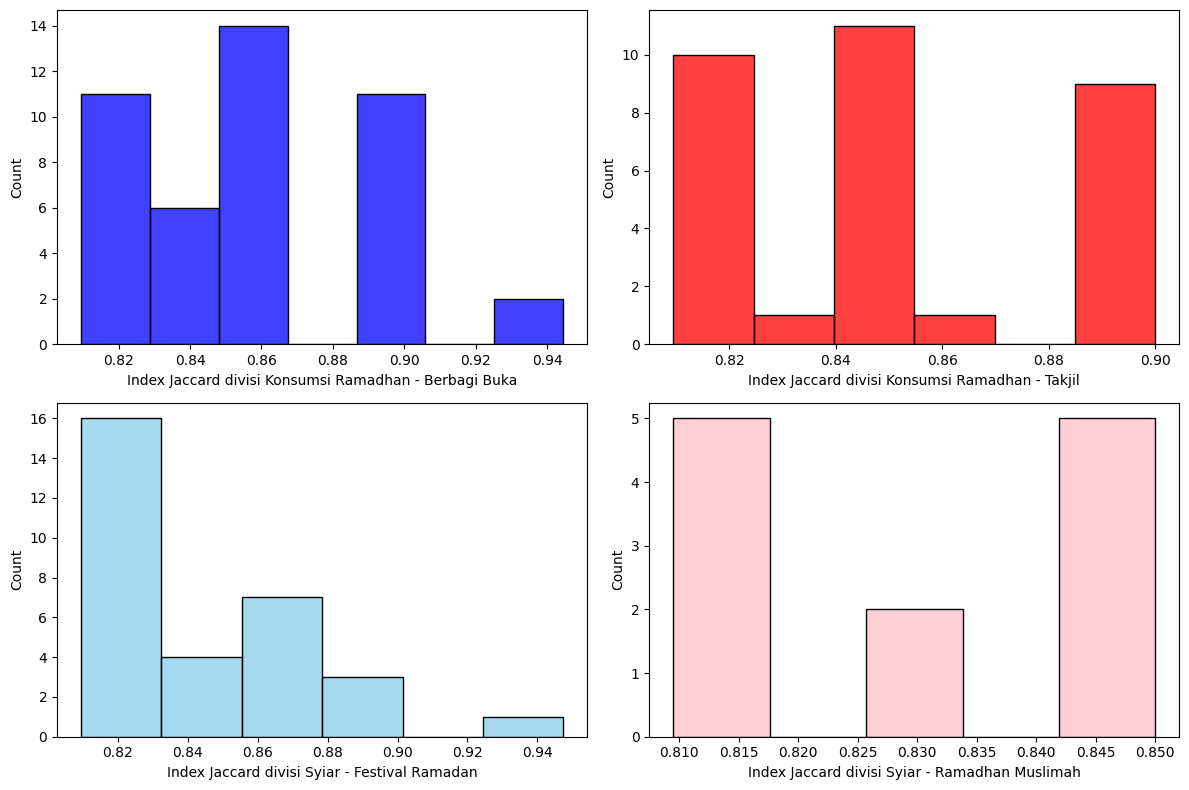

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the histograms for each DataFrame
sns.histplot(data=df_indexjacard, x="Jaccard_Index", color="blue", ax=axes[0, 0])
axes[0, 0].set_xlabel("Index Jaccard divisi Konsumsi Ramadhan - Berbagi Buka")

sns.histplot(data=df_indexjacard2, x="Jaccard_Index", color="red", ax=axes[0, 1])
axes[0, 1].set_xlabel("Index Jaccard divisi Konsumsi Ramadhan - Takjil")

sns.histplot(data=df_indexjacard3, x="Jaccard_Index", color="skyblue", ax=axes[1, 0])
axes[1, 0].set_xlabel("Index Jaccard divisi Syiar - Festival Ramadan")

sns.histplot(data=df_indexjacard4, x="Jaccard_Index", color="pink", ax=axes[1, 1])
axes[1, 1].set_xlabel("Index Jaccard divisi Syiar - Ramadhan Muslimah")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()




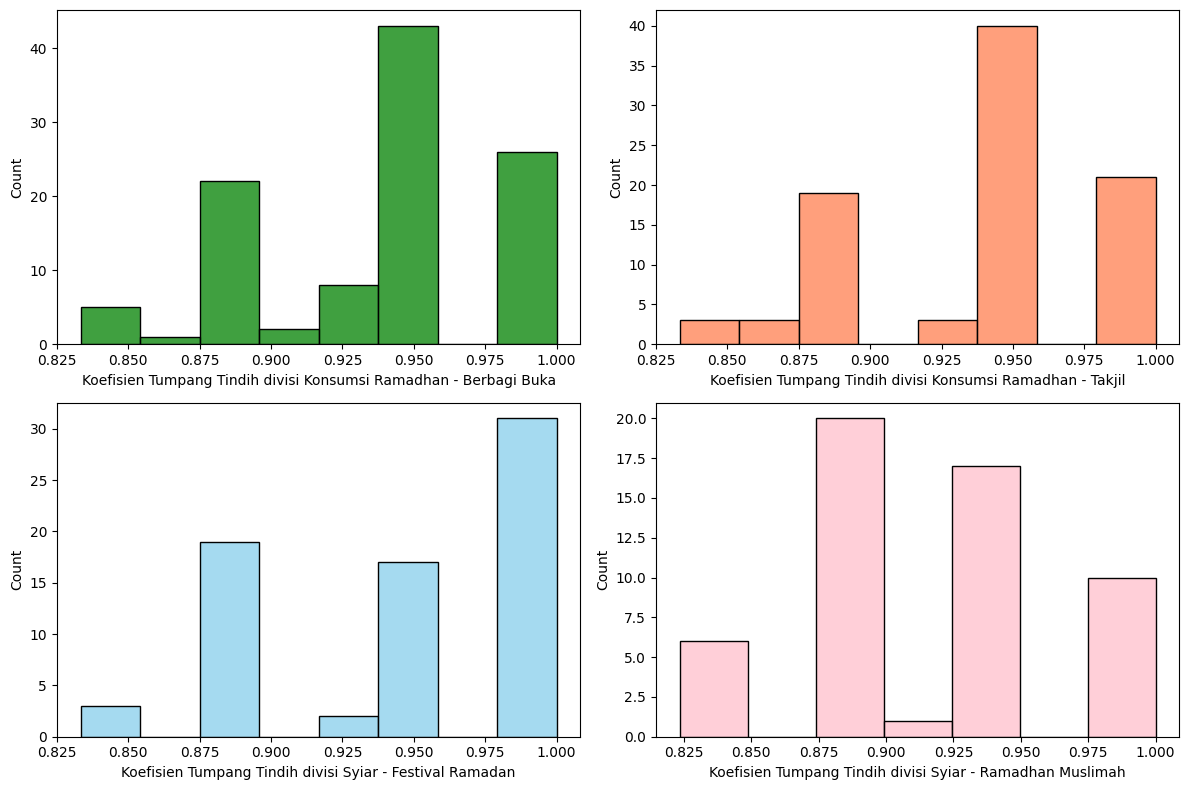

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the histograms for each DataFrame
sns.histplot(data=df_koeftumpangtindih, x="Overlap_Coefficient", color="green", ax=axes[0, 0])
axes[0, 0].set_xlabel("Koefisien Tumpang Tindih divisi Konsumsi Ramadhan - Berbagi Buka")

sns.histplot(data=df_koeftumpangtindih2, x="Overlap_Coefficient", color="coral", ax=axes[0, 1])
axes[0, 1].set_xlabel("Koefisien Tumpang Tindih divisi Konsumsi Ramadhan - Takjil")

sns.histplot(data=df_koeftumpangtindih3, x="Overlap_Coefficient", color="skyblue", ax=axes[1, 0])
axes[1, 0].set_xlabel("Koefisien Tumpang Tindih divisi Syiar - Festival Ramadan")

sns.histplot(data=df_koeftumpangtindih4, x="Overlap_Coefficient", color="pink", ax=axes[1, 1])
axes[1, 1].set_xlabel("Koefisien Tumpang Tindih divisi Syiar - Ramadhan Muslimah")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



In [22]:
# print(df_indexjacard[21].str.count("masak").sum())
df_indexjacard.iloc[:, 24].str.count("masak").sum()
df_indexjacard.iloc[:25, 24]


0     setiapmenjadipanitiakonsumsientahkenapapunyake...
1     karenasayainginmemastikanjamaahmendapatkankons...
2     sayainginberkomunikasilangsungdenganmasyarakat...
3     karenadalamhadisdisebutkan siapa rima orangyan...
4     karenainginmembantumembagikankonsumsiberbukapu...
5     karenasayainginikutdalammembagikanbukaanuntuko...
6     karenasayasangatsukasaatmomenberbagimakananunt...
7     inginmencobahalbaru terutamaberbagiuntukberbuk...
8     inginmembantumemberikanmakananuntukberbuka aga...
9     alasansayamemilihbidangkonsumsiramadhan-berbag...
10                 pengenngerasainfeelngebagiinkonsumsi
11    membagikanmakanankepadaorangyangberbukamerupak...
12    agardapatlebihbanyakinteraksidenganbanyakorang...
13    karenasayaberpengalamandibidangkonsumsidibeber...
14    karenamerupakanbidangyangsayarasasayamampuuntu...
15    karenamempersiapkanberbukamerupakansalahsatuke...
16    karenamelihatkondisikemungkinbisamelakukanberb...
17    karenasesuaidenganhalyangpernahsayadengarb

In [23]:

# PENERAPAN
# Menginisialisasi dataset baru untuk menyimpan hasil seleksi
df["Jaccard_Index"] = 0.0
df["Overlap_Coefficient"] = 0.0
dataset_indexjacard = []
dataset_koeftumpangtindih = []

# Seleksi dan perbandingan
for index, selected_value in enumerate(df["Alasan Memilih Bidang /Divisi Pertama ?"]):
    # print(df["Pilihan Pertama Bidang -  Divisi"][index])
    # print(selected_value)
    # print(index)
    if index <500 and df["Pilihan Pertama Bidang -  Divisi"][index] == "Konsumsi Ramadhan - Berbagi Buka":
        # print(i)
        # print(df["Pilihan Pertama Bidang -  Divisi"][index] )
        jaccard_index, overlap_coefficient = calculateJaccardOverlap(indikator_buka, selected_value)

        # Update the new columns
        df.at[index, "Jaccard_Index"] = jaccard_index
        df.at[index, "Overlap_Coefficient"] = overlap_coefficient

        if jaccard_index > 0.8 :
            dataset_indexjacard.append(df.iloc[index].reset_index(drop=True))
            # print(dataset_indexjacard)
        if  overlap_coefficient > 0.8:
            dataset_koeftumpangtindih.append(df.iloc[index].reset_index(drop=True))

# Membuat DataFrame baru dari hasil seleksi
df_indexjacard = pd.DataFrame(dataset_indexjacard).reset_index(drop=True)
df_koeftumpangtindih = pd.DataFrame(dataset_koeftumpangtindih).reset_index(drop=True)

# Print DataFrame baru
print("DataFrame baru dari hasil seleksi dengan Jaccard Index dan Overlap Coefficient > 0.8:")
df_indexjacard = df_indexjacard.rename(columns={2: 'Nama Lengkap', 275: 'Jaccard_Index', 276: 'Overlap_Coefficient'})
selected_columns = [2, 275, 276]
print(df_indexjacard.iloc[:, selected_columns])


DataFrame baru dari hasil seleksi dengan Jaccard Index dan Overlap Coefficient > 0.8:
                        Nama Lengkap  Jaccard_Index  Overlap_Coefficient
0                             Nining       0.850000             0.944444
1               Muhammad Raja Ababil       0.809524             0.944444
2              Djauhari Adham Roseno       0.850000             0.944444
3                  Siti Sopa Lismaya       0.809524             0.944444
4        Muhammad Fadli Fauzi Sileuw       0.944444             1.000000
5            Gemuruh Bagus Wirayudha       0.900000             1.000000
6                 Risma Suci Nabilah       0.809524             0.944444
7   Zahra Fariha Nuruzzakiah Artyasa       0.842105             0.941176
8                 Moch Andrian Akbar       0.857143             1.000000
9                 Achmad Kabir Rifai       0.818182             1.000000
10              Izma Alhazmi Herdian       0.833333             1.000000
11                 Salis Siti Jenab   

# Output Files

In [ ]:
df_duplicate.to_excel('duplicate.xlsx', index = False, header=True)

In [ ]:
df_transformed.to_excel('final.xlsx', index = False, header=True)
df.to_excel('raw.xlsx', index = False, header=True)